# Importing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Seattle data

In [2]:
seattle_calendar = pd.read_csv('seattle_data_airbnb/calendar.csv')
seattle_listings = pd.read_csv('seattle_data_airbnb/listings.csv')
seattle_reviews = pd.read_csv('seattle_data_airbnb/reviews.csv')

In [3]:
seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
seattle_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
seattle_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


Lets take a closer look at the listing dataset

In [6]:
seattle_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

## High level questions on the data

1. How many listings are there?
2. For what time frame is the data given
3. How many reviews are there?

In [7]:
# 1. How many listings are there?

print('Num listings = ' + str(seattle_listings.shape[0]))

Num listings = 3818


In [8]:
# 2. Time frame of data
# The time frame is held in the date column in the seattle_calendar dataset
# This is currently a string column and not a date type column yet
# The dataset if ordered linearly in time ( per listing ) and there is a row against each data for each listing
# Hence the first and last rows should tell us the time frame

print( 'Starting date: ' + seattle_calendar.date[0] )
print( 'Ending date: ' + seattle_calendar.date[seattle_calendar.shape[0]-1] )

# The data ranges from 4-Jan-2016 to 2-Jan-2017

Starting date: 2016-01-04
Ending date: 2017-01-02


### Custom functions that become useful later on

In [9]:
def respect_nulls(x, f):
    if pd.isnull(x):
        return x
    else:
        return f(x)

In [10]:
remove_pct = lambda x: str.replace(x, '%','')
remove_dollar = lambda x: str.replace(x,'$','')
remove_comma = lambda x: str.replace(x, ',','')

In [11]:
def price_per_unit(price, units):
    if pd.isnull(units) or units == 0:
        return np.nan
    else:
        return price/units

## Questions on the structure of the data and meaning of the columns

The [Inside Airbnb website](http://insideairbnb.com/seattle/#) was very ueful in helping me understand certain fields

The reviews and calendar datasets are pretty self explanatory. Lets focus on the listings dataset

1. What do the following columns mean
    1. host_reponse_rate, host_response_time, host_acceptance_rate, host_is_superhost, host_location
    2. host_listings_count and host_total_listings_count
    3. host_identity_verified
    4. host_verifications
    5. neighbourhood, neighbourhood_cleansed and neighbourhood_group_cleansed
    6. market
    7. guests_included
    8. extra_people
    9. has_availability, has_availability_30, has_availability_60, has_availability_90, has_availability_365
    10. first_review, last_review
    11. requires_license, license
    12. summary, space, description
    13. street -> Is this the street address
    14. amenities -> Is this picked from a drop down or is it free form
    15. notes
    16. transit
    17. calendar_updated, calendar_last_scrap
    18. smart_location
    19. is_location_exact    
    20. experiences_offered
    21. property_type
    22. room_type
    23. instant_bookable
    24. cancellation_policy
    
2. Can there be multiple listings by a single host? - Seems natural to expect this, but can we see this in the data

## Finding anwers to the above questions

### Meanings of and values taken by several columns

In [12]:
# host_response_rate
seattle_listings['host_response_rate'].head()

0     96%
1     98%
2     67%
3     NaN
4    100%
Name: host_response_rate, dtype: object

The column is a string with % appended top every non null value. Lets modify the same and observe the distribution

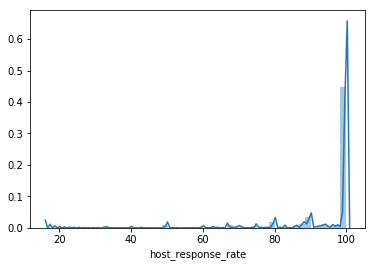

In [13]:
sns.distplot( pd.to_numeric( seattle_listings['host_response_rate'].apply(lambda x: respect_nulls(x, remove_pct)) ) )    

One can observe the distribution is very skwewed and is very heavy at and around 100%
Hence may be having 100% response rate may not mean much, however not having a 100% response rate might mean something though

In [14]:
# host_response_time

seattle_listings['host_response_time'].value_counts()

# Again a very skewed distribution. It seems most hosts are pretty responsive

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

In [15]:
# host_acceptance_rate
seattle_listings['host_acceptance_rate'].value_counts()

# host_acceptance_rate = 100% almost all the time its populated ( 3044/3818 = 79.72% ). Hence we could say the field is either null or equal to 100%

100%    3044
0%         1
Name: host_acceptance_rate, dtype: int64

In [16]:
# host_is_superhost

# Firstly who is a super host?
# Definition of super host: https://www.airbnb.co.in/help/article/828/what-is-a-superhost

seattle_listings['host_is_superhost'].value_counts()

# Few people are super hosts which seems understandable
# The field is populated for all but 2 records
# 20.3% of the listings are from super hosts, the remaining 79.7% is from non super hosts

f    3038
t     778
Name: host_is_superhost, dtype: int64

In [17]:
# Lets take a look at how many hosts are there and how many are super hosts

num_unique_hosts = len(set(seattle_listings['host_id'].unique())) 
num_super_hosts = len(set(seattle_listings[seattle_listings['host_is_superhost'] == 't']['host_id'].unique()))
num_non_super_hosts = len(set(seattle_listings[seattle_listings['host_is_superhost'] == 'f']['host_id'].unique()))

print('Num unique host: ' + str(num_unique_hosts) )
print('Num super hosts: ' + str(num_super_hosts) + ' : ' + str( round( (num_super_hosts/num_unique_hosts)*100 , 2) )  + '%' )
print('Num non-super hosts: ' + str(num_non_super_hosts) + ' : ' + str( round( (num_non_super_hosts/num_unique_hosts)*100,2) ) + '%')

Num unique host: 2751
Num super hosts: 537 : 19.52%
Num non-super hosts: 2212 : 80.41%


In [18]:
# host_location

seattle_listings['host_location'].value_counts()

# Takes a variety of values with a pretty long tail

Seattle, Washington, United States                             3259
US                                                              246
Spokane, Washington, United States                               41
Kent, Washington, United States                                  34
Los Angeles, California, United States                           13
Bellevue, Washington, United States                              12
San Francisco, California, United States                         11
Mercer Island, Washington, United States                         10
Kirkland, Washington, United States                               8
New York, New York, United States                                 6
Shoreline, Washington, United States                              5
Sammamish, Washington, United States                              5
Seattle                                                           5
Vashon, Washington, United States                                 5
Vancouver, Washington, United States            

In [19]:
# 1.b host_listings_count and host_total_listings_counts

# Both are numeric columns

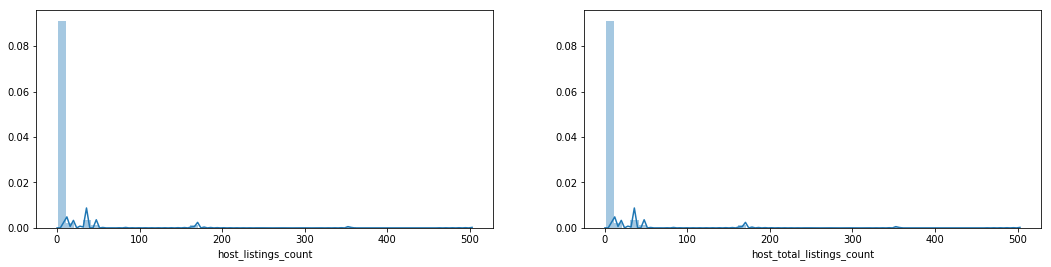

In [20]:
# host_listings_count
fig, ax = plt.subplots(1,2, figsize = (18,4) )
sns.distplot( seattle_listings['host_listings_count'].dropna(), ax = ax[0] )
sns.distplot( seattle_listings['host_total_listings_count'].dropna(), ax = ax[1] )

In [21]:
# The two distributions look really similar. How often are the two values equal?

print( '% of rows where the two are equal: ' + str(seattle_listings.dropna(subset = ['host_total_listings_count', 'host_listings_count']).apply(lambda x: x['host_total_listings_count'] == x['host_listings_count'], axis = 1 ).mean() ) )
print( 'num rows where the two are not equal: ' + str(seattle_listings[seattle_listings['host_listings_count'] != seattle_listings['host_total_listings_count']].shape[0]))
print( 'rows where the 2 are not equal: ')
print(seattle_listings[seattle_listings['host_listings_count'] != seattle_listings['host_total_listings_count']][['id', 'host_listings_count', 'host_total_listings_count']])

% of rows where the two are equal: 1.0
num rows where the two are not equal: 2
rows where the 2 are not equal: 
            id  host_listings_count  host_total_listings_count
1297   8354452                  NaN                        NaN
1419  10235014                  NaN                        NaN


Hence the columns host_listings_count and host_total_listings_count are identical

In [22]:
# 1.c host_identity_verified
# This is a boolean variable represented as a string (t/f)

seattle_listings['host_identity_verified'].value_counts()

t    2997
f     819
Name: host_identity_verified, dtype: int64

In [23]:
num_identity_verified_hosts = len(set(seattle_listings[seattle_listings['host_identity_verified'] == 't']['host_id'].unique()))
num_identity_not_verified_hosts = len(set(seattle_listings[seattle_listings['host_identity_verified'] == 'f']['host_id'].unique()))

print('Num unique host: ' + str(num_unique_hosts) )
print('Num hosts with identity verification: ' + str(num_super_hosts) + ' : ' + str( round( (num_identity_verified_hosts/num_unique_hosts)*100 , 2) )  + '%' )
print('Num hosts without identity verification: ' + str(num_non_super_hosts) + ' : ' + str( round( (num_identity_not_verified_hosts/num_unique_hosts)*100,2) ) + '%')

Num unique host: 2751
Num hosts with identity verification: 537 : 75.14%
Num hosts without identity verification: 2212 : 24.79%


The column is mostly populated (2997+819)/3818 = 3816/3818 = 0.999476166 ( i.e only 2 records where its not populated )
<br>
2997/3816 = 78.5% of the listings have their host's identity verified
<br>
21.5% of the records where the host identity is not verified<br>

In [24]:
# 1.d host_verifications

# String type column. Contains the list of verifications done for a given host

seattle_listings['host_verifications'].head()

# One could identify the full list of host verifications possible. We could do that at a later point if necessary

0                 ['email', 'phone', 'reviews', 'kba']
1    ['email', 'phone', 'facebook', 'linkedin', 're...
2     ['email', 'phone', 'google', 'reviews', 'jumio']
3    ['email', 'phone', 'facebook', 'reviews', 'jum...
4     ['email', 'phone', 'facebook', 'reviews', 'kba']
Name: host_verifications, dtype: object

In [25]:
# 1.e neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed

seattle_listings[['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']].drop_duplicates().head()

# neighbourhood seems to be a column describing the neighbourhood as one would expect
# The latter 2 seem to be preprocessed and cleaned versions of the same

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,Queen Anne,West Queen Anne,Queen Anne
12,NaN,West Queen Anne,Queen Anne
65,NaN,Adams,Ballard
66,Ballard,Adams,Ballard
135,Ballard,West Woodland,Ballard


In [26]:
# How many distinct neighbourhoods and neighbourhood groups are there?

print( 'Num neighbourhoods listed in Seattle: ' + str(len(set(seattle_listings.neighbourhood_cleansed.unique()))))
print( 'Num neighbourhood groups listed in Seattle: ' + str(len(set(seattle_listings.neighbourhood_group_cleansed.unique()))))

Num neighbourhoods listed in Seattle: 87
Num neighbourhood groups listed in Seattle: 17


In [27]:
# 1.f market

seattle_listings['market'].value_counts()

# This is Seattle all the time and hence doesnt differentiate any rows

Seattle    3818
Name: market, dtype: int64

In [28]:
# 1.g guest_included

seattle_listings['guests_included'].value_counts()

# Indicates the number of guests allowed in the facility. Againa fairly skewed distribution, heavy at 1 and tapers off after that.
# Surprisingly there are some facilities where there are no guests allowed

1     2275
2      989
4      237
0       92
3       80
6       71
5       28
8       24
7       14
9        2
10       2
15       1
13       1
11       1
12       1
Name: guests_included, dtype: int64

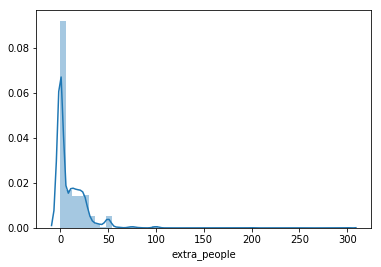

In [29]:
# 1.h extra_people

# Contains the charge for bringing in one extra person to the listing
# Its a string prepended with the $ sign

sns.distplot( pd.to_numeric( seattle_listings['extra_people'].apply(lambda x: respect_nulls(x, remove_dollar)) ) )

# Most people seem to charge nothing. The rest are largely less than 50$, with some going much higher

In [30]:
# 1.i has_availability, has_availability_30, has_availability_60, has_availability_90, has_availability_365

seattle_listings[['has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365']].head()

,has_availability,availability_30,availability_60,availability_90,availability_365
0,t,14,41,71,346
1,t,13,13,16,291
2,t,1,6,17,220
3,t,0,0,0,143
4,t,30,60,90,365


In [31]:
seattle_listings['has_availability'].value_counts()

t    3818
Name: has_availability, dtype: int64

availability_xyz is the number of the days the listing is available in the upcoming xyz days

has_availability is always true and is hence not very useful information.
Its likely so because we are only looking at the active listings on AirBnb for the given time period

In [32]:
# 1.j first_review, last_review

seattle_listings[['first_review','last_review']].head()

# These are dates represented as strings and indicate the date of the first and last review written for that listing

,first_review,last_review
0,2011-11-01,2016-01-02
1,2013-08-19,2015-12-29
2,2014-07-30,2015-09-03
3,NaN,NaN
4,2012-07-10,2015-10-24


In [33]:
# 1.k requires_license, license

print( seattle_listings['requires_license'].value_counts() )
print( seattle_listings['license'].value_counts() )

# requires_license is populated for all rows and always false
# license is always null
# hence neither column is very useful

f    3818
Name: requires_license, dtype: int64
Series([], Name: license, dtype: int64)


In [34]:
# 1.l summary, space, description

seattle_listings[['summary', 'space', 'description']].head()

# At first glance they all seem to talking about the same or similar things. Summary and description seem identical from these 5 rows
# We can investigate further, possibly extract keywords etc from them if need be at a later point

,summary,space,description
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...
3,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...
4,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...


In [35]:
# 1.m  street

seattle_listings['street'].head()

# This is the street address of the listing

0        Gilman Dr W, Seattle, WA 98119, United States
1    7th Avenue West, Seattle, WA 98119, United States
2    West Lee Street, Seattle, WA 98119, United States
3    8th Avenue West, Seattle, WA 98119, United States
4         14th Ave W, Seattle, WA 98119, United States
Name: street, dtype: object

In [36]:
# 1.n amenities

seattle_listings['amenities'].head()

# A list of facilities available in the facility
# One can see from the data below and the AirBnb website thats is a fixed list and hosts have to chose from the same

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, dtype: object

In [37]:
# 1.o notes

seattle_listings['notes'].head()

# As the name suggests, its a note to guest or prospective guest. Sort of an extension to description in some ways

0                                                  NaN
1    What's up with the free pillows?  Our home was...
2    Our house is located just 5 short blocks to To...
3                                                  NaN
4                                            Belltown 
Name: notes, dtype: object

In [38]:
# 1.p transit

seattle_listings['transit'].head()

# Description on the nearest public transport and how to get to and move around the place
# Not quite usable unless we extra features from it

0                                                  NaN
1    Convenient bus stops are just down the block, ...
2    A bus stop is just 2 blocks away.   Easy bus a...
3                                                  NaN
4    The nearest public transit bus (D Line) is 2 b...
Name: transit, dtype: object

In [39]:
# 1.q calendar_updated, calendar_last_scrap

seattle_listings[['calendar_updated', 'calendar_last_scraped']].head()

# calendar_last_scraped is the date the calendar was last pulled
# calendar_updated is a textual representation of the same information

,calendar_updated,calendar_last_scraped
0,4 weeks ago,2016-01-04
1,today,2016-01-04
2,5 weeks ago,2016-01-04
3,6 months ago,2016-01-04
4,7 weeks ago,2016-01-04


In [40]:
# 1.r smart_location

seattle_listings['smart_location'].value_counts()

# 3810/3818 listings have smart_location listed as 'Seattle, WA'. The rest are slight variations of the same
# Doesnt really differentiate the rows in any significant way

Seattle, WA                  3810
West Seattle, WA                2
Seattle , WA                    2
seattle, wa                     1
Phinney Ridge Seattle, WA       1
西雅图, WA                         1
Ballard, Seattle, WA            1
Name: smart_location, dtype: int64

In [41]:
# 1.s is_location_exact

seattle_listings['is_location_exact'].value_counts()

# The column is populated for all rows
# 3412/3818 = 89.3% of the listings are supposed to have an exact location
# The remaining 10.7% dont have an exact location listed1

t    3412
f     406
Name: is_location_exact, dtype: int64

In [42]:
# 1.t experiences_offered

seattle_listings['experiences_offered'].value_counts()

# Null all the time

none    3818
Name: experiences_offered, dtype: int64

In [43]:
# 1.u property_type

seattle_listings['property_type'].value_counts()

# The top 2 have significant numbers. Townhouse and condo with counts around 100 are good too.
# The rest have too small a population to derive much value out of

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

In [44]:
# 1.v room_type

seattle_listings['room_type'].value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [45]:
# Are room type and property_type populated for each row?

print( 'Num rows with null room_type: ' + str(seattle_listings[seattle_listings['room_type'].isnull()].shape[0]) )
print( 'Num rows with null property_type: ' + str(seattle_listings[seattle_listings['property_type'].isnull()].shape[0]) )

Num rows with null room_type: 0
Num rows with null property_type: 1


In [46]:
# 1.w instant_bookable

seattle_listings['instant_bookable'].value_counts()

# Populated for all rows
# 591/3818 = 15.5% listings are instant bookable

f    3227
t     591
Name: instant_bookable, dtype: int64

In [47]:
# 1.x cancellation_policy

seattle_listings['cancellation_policy'].value_counts()

#Populated for all rows
#Fairly even distibution

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

In [48]:
# 2. Can a single host have multiple listings?

# There is a host_id column. Lets see how many listings do people have

num_listings_per_host = seattle_listings.groupby('host_id').count()
num_listings_per_host['id'].value_counts()

# As one would expect most people have just facility listed
# A few have 2 facilities and the number of drops quickly with the number of listings by the same host

1     2285
2      297
3       85
4       38
5       18
6        5
9        3
7        3
10       3
11       2
12       2
16       1
8        1
39       1
18       1
34       1
36       1
37       1
21       1
33       1
46       1
Name: id, dtype: int64

## Summary of above analysis

1. What do the following columns mean
    1. host_reponse_rate, host_response_time, host_acceptance_rate, host_is_superhost, host_location
        <br>
        host_reponse_rate is pretty close to 100% of the time
        <br>
        host_reponse_time is mostly 'within an hour' or 'within a few hours'
        <br>
        host_acceptance_rate is 100% for 80% rows and null for the remaining 20%
        <br>
        host_is_superhost: 2751 unique hosts, ~20% are super hosts, ~80% are non-super hosts
        <br>
        host_location: Indicates where the host lives, Takes a variety of values. Most hosts live in Seattle though
    2. host_listings_count and host_total_listings_count
        <br>
        Numeric field. Indicate number of listings by the same host
        <br>
        Both fields host_listings_count and host_total_listings_count are equal
    3. host_identity_verified
        <br>
        78.5% records are from hosts that are verified, 21.5% from non-verfiied
        <br>
        ~75% of the hosts have their identity verified
    4. host_verifications
        <br>
        Contains list of verifications done on the host's identity
    5. neighbourhood, neighbourhood_cleansed and neighbourhood_group_cleansed
        <br>
        neighbourhood describes the neighbourhood of the listing as one expects
        <br>
        neighbourhood_cleansed and neighbourhood_group_cleansed are pre-processed and cleaned versions of the same
        <br>
        There are 87 unique neighbourhoods and 17 unique neighbourhood groups
    6. market
        <br>
        This column is always equal to 'Seattle'
    7. guests_included
        <br>
        Numeric column indicating the number of guests allowed in the listed facility
        <br>
        Skewed distribution, heavy at 1 and tapers off quickly with increasing number of guests
    8. extra_people
        <br>
        Charges for bringing extra people in the facility
        <br>
        Most people charge nothing. The rest are at or below 50\\$ largely. There is a bit of a tail above 50\\$ too
    9. has_availability, availability_30, availability_60, availability_90, availability_365
        <br>
        has_availability is always 't'
        <br>
        availability_xyz is the number of the days the listing is available in the upcoming xyz days
    10. first_review, last_review
        <br>
        Dates of the first and last review
    11. requires_license, license
        <br>
        Redundant columns
        <br>
        requires_license is always 'f' and license is always null
    12. summary, space, description
        <br>
        Mutiple descriptions of the place catering to slightly different nuances
    13. street -> Is this the street address
        <br>
        Yes, its the street address of the listing
    14. amenities -> Is this picked from a drop down or is it free form
        <br>
        Pick list from a fixed list of amenities listed in AirBnb
    15. notes
        <br>
        Note to the ( prospective ) guest. Extension of description in a way
    16. transit
        <br>
        Text field. Nearest public transport options and how to get to and move around the place
    17. calendar_updated, calendar_last_scrap
        <br>
        Last date the calendar was pulled with regards to this listing
    18. smart_location
        <br>
        Practically always 'Seattle, WA'
    19. is_location_exact
        <br>
        Indicates if the listed location is exact
        <br>
        89.3% of the facilities have listed an exact location. 10.6% have not
    20. experiences_offered
        <br>
        Null for all records
    21. property_type
        <br>
        Takes several values. Main 4 values are:
        1. House
        2. Apartment
        3. Townhouse
        4. Condominium        
    22. room_type
        Takes 3 values
        1. Entire home/apt
        2. Private room
        3. Shared room        
    23. instant_bookable
        <br>
        15.5% of the listings are instantly bookable
    24. cancellation_policy
        <br>
        Takes 3 values - strict, medium and flexible. Fairly even distributed between them    
        
2. Can there be multiple listings by a single host? - Seems natural to expect this, but can we see this in the data?
<br>
      Yes, a host can have multiple listings.
      The data indicates most people have only one listing. Some have 2-3 and the numbers fall sharply for more than 3 listings per host      

## Questions we can look to answer from the above data

1. When are listings typically available?
    1. Are they available only on weekends or are they available all through the week?
    2. Is there a seasonality pattern across months of the year?<br>
    This question was inspired by [Josh Bernard's blog on the analysis of Seattle and Boston AirBnb data](https://medium.com/@josh_2774/a-comparison-of-airbnb-homes-seattle-vs-boston-cdc0df2cfcd7)
2. What is the typical discout for dailyrenting a house for a week or a month?
3. What variations can one see across neighbourhoods in Seattle?
    1. Where most listings are concentrated?
    2. Is there a skew in distribution of prices between neighbourhoods?
    3. Are some neighbourhoods more available than the other?

## Data type conversions and cleaning

Before we get to answering the above questions, lets clean up the data and do any transforms required

In [49]:
# Converting price columns to numeric - price, weekly_price, monthly_price

seattle_listings['price'] = pd.to_numeric( seattle_listings['price'].apply(lambda x: respect_nulls(respect_nulls(x, remove_dollar),remove_comma)))
seattle_listings['weekly_price'] = pd.to_numeric( seattle_listings['weekly_price'].apply(lambda x: respect_nulls(respect_nulls(x, remove_dollar),remove_comma)))
seattle_listings['monthly_price'] = pd.to_numeric( seattle_listings['monthly_price'].apply(lambda x: respect_nulls(respect_nulls(x, remove_dollar),remove_comma)))

In [50]:
seattle_listings[['price', 'weekly_price', 'monthly_price']].head()

,price,weekly_price,monthly_price
0,85.0,NaN,NaN
1,150.0,1000.0,3000.0
2,975.0,NaN,NaN
3,100.0,650.0,2300.0
4,450.0,NaN,NaN


In [51]:
# Processing the calendar dataset

#Converting the date column to a datetime
seattle_calendar['date'] = pd.to_datetime( seattle_calendar['date'] )

#Computing the day of week
seattle_calendar['dayofweek'] = seattle_calendar['date'].apply(lambda x: x.day_name())

#Computing the month of the year
seattle_calendar['month'] = seattle_calendar['date'].apply(lambda x: x.month)

#Converting available to a boolean column
seattle_calendar['available'] = seattle_calendar['available'].apply(lambda x: x == 't')

In [52]:
# Data manipulations for predicting price from features

seattle_listings['medium_url_exists'] = seattle_listings.medium_url.apply(lambda x: not(pd.isna(x)))
seattle_listings['picture_url_exists'] = seattle_listings.picture_url.apply(lambda x: not(pd.isna(x)))
seattle_listings['host_since'] = pd.to_datetime( seattle_listings['host_since'] )

seattle_listings['host_response_rate'] = pd.to_numeric( seattle_listings['host_response_rate'].apply(lambda x: respect_nulls(x, remove_pct)) )    
seattle_listings['host_acceptance_rate'] = pd.to_numeric( seattle_listings['host_acceptance_rate'].apply(lambda x: respect_nulls(x, remove_pct)) )    
seattle_listings['host_response_rate_100'] = seattle_listings.host_response_rate == 100 
seattle_listings['host_acceptance_rate_100'] = seattle_listings.host_acceptance_rate == 100
seattle_listings['host_acceptance_rate_null'] = seattle_listings.host_acceptance_rate.isna()

seattle_listings['host_is_superhost'] = seattle_listings.host_is_superhost.apply(lambda x: x=='t')
seattle_listings['host_identity_verified'] = seattle_listings.host_identity_verified.apply(lambda x: x=='t')
seattle_listings['extra_people'] = pd.to_numeric( seattle_listings['extra_people'].apply(lambda x: respect_nulls(x, remove_dollar)) ) 
seattle_listings['extra_people_0'] = seattle_listings.extra_people == 0
seattle_listings['extra_people_0+_50'] = seattle_listings.extra_people.apply(lambda x: x>0 and x<=50)
seattle_listings['extra_people_50+'] = seattle_listings.extra_people.apply(lambda x: x>50)

# Questions

## 1. When are listings typically available?
    
1. Weekends only or all through the week?
2. Is there a seasonality pattern?
3. Are the neighbourhood variations?
    
We need to analyze the calendar dataset for this question.
Lets see what it looks like

In [53]:
seattle_calendar.head()

,listing_id,date,available,price,dayofweek,month
0,241032,2016-01-04,True,$85.00,Monday,1
1,241032,2016-01-05,True,$85.00,Tuesday,1
2,241032,2016-01-06,False,NaN,Wednesday,1
3,241032,2016-01-07,False,NaN,Thursday,1
4,241032,2016-01-08,False,NaN,Friday,1


What date range does the data span?

In [54]:
print( 'Min date in calendar data: ' + str(seattle_calendar.date.min()))
print( 'Max date in calendar data: ' + str(seattle_calendar.date.max()))

Min date in calendar data: 2016-01-04 00:00:00
Max date in calendar data: 2017-01-02 00:00:00


Now lets analyse variations across day of the week

In [55]:
seattle_calendar.groupby('dayofweek').mean()[['available']]

,available
dayofweek,
Friday,0.668911
Monday,0.671101
Saturday,0.667758
Sunday,0.673001
Thursday,0.669743
Tuesday,0.671954
Wednesday,0.671793


There doesnt seem to be much variation amongst the days of the week

Let's see if there is some at the neighbourhood level. But before we check day of week variations at the neighbourhood, lets check overall availability at the neighbourhood level

In [56]:
pd.merge(seattle_calendar, seattle_listings[['id','neighbourhood_group_cleansed']], left_on = 'listing_id', right_on = 'id').groupby('neighbourhood_group_cleansed').mean().sort_values('available', ascending = False)['available']

neighbourhood_group_cleansed
Interbay               0.845330
Magnolia               0.774669
Lake City              0.768800
Delridge               0.747182
University District    0.744397
Northgate              0.722774
Beacon Hill            0.702809
West Seattle           0.701127
Ballard                0.692257
Seward Park            0.680012
Central Area           0.672354
Other neighborhoods    0.671685
Rainier Valley         0.670526
Downtown               0.649910
Capitol Hill           0.641048
Queen Anne             0.620423
Cascade                0.576174
Name: available, dtype: float64

We clearly see some variation here amongst areas

3 of the five central seattle areas are on the low end of the availability spectrum. However interestingly, Interbay and Magnolia from central seattle have the highest availability too

Now lets look at day of week variations across neighbourhoods

In [57]:
pd.merge(seattle_calendar, seattle_listings[['id','neighbourhood_group_cleansed']], left_on = 'listing_id', right_on = 'id').groupby(['neighbourhood_group_cleansed', 'dayofweek']).mean()['available'].unstack()

dayofweek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
neighbourhood_group_cleansed,,,,,,,
Ballard,0.685953,0.694586,0.684365,0.693395,0.691806,0.697241,0.698411
Beacon Hill,0.699153,0.703230,0.697360,0.701923,0.704205,0.707790,0.705997
Capitol Hill,0.642552,0.640378,0.641602,0.643942,0.640144,0.639601,0.639126
Cascade,0.572602,0.574942,0.572169,0.576491,0.577139,0.579948,0.579948
Central Area,0.668022,0.675308,0.667136,0.675005,0.672035,0.675005,0.673911
Delridge,0.749757,0.742298,0.750000,0.747809,0.746592,0.746105,0.747809
Downtown,0.646226,0.652581,0.645646,0.655733,0.646154,0.652721,0.650254
Interbay,0.844406,0.843911,0.846154,0.847902,0.844406,0.844406,0.846154
Lake City,0.767509,0.765981,0.764925,0.768657,0.772962,0.767796,0.773823


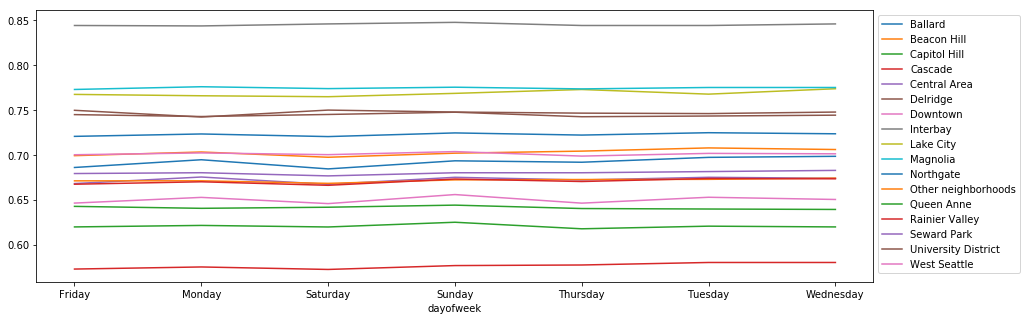

In [58]:
fig, ax = plt.subplots(1,1, figsize =(15,5))
# ax.set_xticks(list(range(1,13)))
pd.merge(seattle_calendar, seattle_listings[['id','neighbourhood_group_cleansed']], left_on = 'listing_id', right_on = 'id').groupby(['dayofweek', 'neighbourhood_group_cleansed']).mean()['available'].unstack().plot(ax =ax)
ax.legend(bbox_to_anchor=(1,1), loc="upper left")

We can see that most neighbourhoods are pretty consistent in their behaviour and dont have any bias towards any particular days of the week.

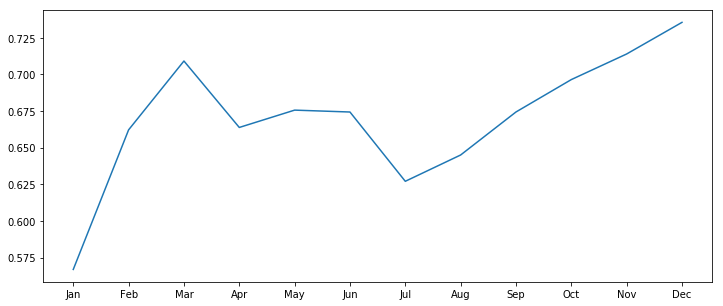

In [59]:
# Seasonal variations

# First we check across the city and then at the neighbourhood level
fig, ax = plt.subplots(1,1, figsize =(12,5))
ax.set_xticks(list(range(1,13)))
ax.set_xticklabels(calendar.month_abbr[1:13])
# ax.set_xticks(['Jan' 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.plot( seattle_calendar.groupby('month').mean().sort_values('month', ascending = True)['available'] )

This is quite interesting. There is a sharp dip in January and sharp increase towards the end of the year peaking at December. The data spans from 4-Jan-2016 to 2-Jan-2017, hence the low availability in Jan cant be an artifact of the data collection process (i.e Data wasnt collected )

May be towards the end of the year more people go on vacation and there is higher demand reflecting in higher availability

Excluding January, July and August are the months with the lowest availability. This coincides with the driest months of the year in Seattle \[[Ref](https://www.usclimatedata.com/climate/seattle/washington/united-states/uswa0395)\]. Might be that people go outside of town typically during this time period and hence listings in Seattle arent available as much.

In [60]:
pd.merge(seattle_calendar, seattle_listings[['id','neighbourhood_group_cleansed']], left_on = 'listing_id', right_on = 'id').groupby(['neighbourhood_group_cleansed', 'month']).mean()['available'].unstack()

month,1,2,3,4,5,6,7,8,9,10,11,12
neighbourhood_group_cleansed,,,,,,,,,,,,
Ballard,0.533043,0.613643,0.682889,0.668551,0.701964,0.731449,0.666199,0.700000,0.721449,0.741094,0.761159,0.779102
Beacon Hill,0.596045,0.692870,0.749043,0.720621,0.737015,0.723729,0.650082,0.696555,0.700847,0.705850,0.716102,0.742482
Capitol Hill,0.544680,0.629326,0.661888,0.613698,0.626842,0.641093,0.601639,0.614781,0.653322,0.680776,0.697942,0.724071
Cascade,0.457678,0.557148,0.635738,0.574532,0.592968,0.562172,0.492207,0.512142,0.584270,0.616890,0.644569,0.680681
Central Area,0.532249,0.655453,0.690532,0.641373,0.665093,0.682023,0.646210,0.662645,0.691689,0.707230,0.731165,0.758808
Delridge,0.611814,0.752510,0.770927,0.759072,0.764394,0.772152,0.714577,0.713761,0.754852,0.768885,0.783122,0.798693
Downtown,0.597925,0.707157,0.748448,0.692704,0.681862,0.644906,0.580158,0.593853,0.610063,0.631102,0.644277,0.668229
Interbay,0.833333,0.896552,0.909091,0.821212,0.812317,0.818182,0.809384,0.806452,0.818182,0.818182,0.893939,0.909091
Lake City,0.677114,0.728770,0.801637,0.787065,0.794896,0.788060,0.695234,0.719788,0.768657,0.819933,0.820896,0.820896


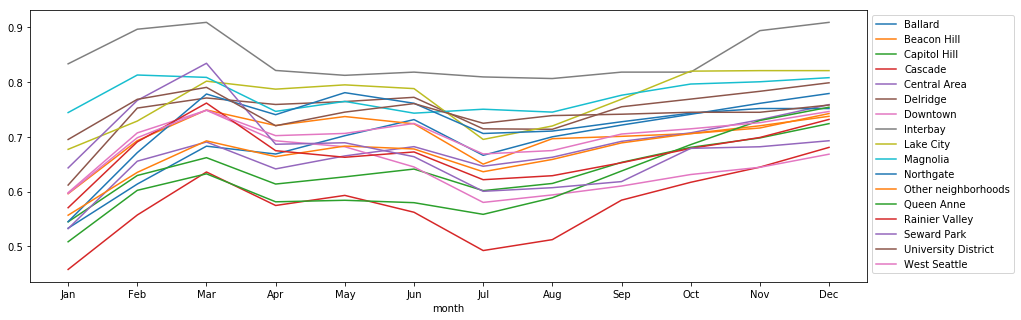

In [61]:
fig, ax = plt.subplots(1,1, figsize =(15,5))
ax.set_xticks(list(range(1,13)))
ax.set_xticklabels(calendar.month_abbr[1:13])
pd.merge(seattle_calendar, seattle_listings[['id','neighbourhood_group_cleansed']], left_on = 'listing_id', right_on = 'id').groupby(['month', 'neighbourhood_group_cleansed']).mean()['available'].unstack().plot(ax =ax)
ax.legend(bbox_to_anchor=(1,1), loc="upper left")

## 2. What is the typical discount for daily vs weekly vs monthly renting?

In [62]:
weekly_price_discounts = seattle_listings.dropna(subset=['weekly_price']).apply(lambda x: (7*x['price'] - x['weekly_price'])/(7*x['weekly_price']), axis = 1)
monthly_price_discounts = seattle_listings.dropna(subset=['monthly_price']).apply(lambda x: (30*x['price'] - x['monthly_price'])/(7*x['monthly_price']), axis = 1)

Before analysing this data, first lets see how many data points do we have for weekly and monthly renting

In [63]:
print( 'Num records with weekly prices: ' + str(weekly_price_discounts.shape[0]) + ' : ' + str( round(weekly_price_discounts.shape[0]*100/seattle_listings.shape[0],2)) + '%')
print( 'Num records with monthly prices: ' + str(monthly_price_discounts.shape[0]) + ' : ' + str( round(monthly_price_discounts.shape[0]*100/seattle_listings.shape[0],2)) + '%')

Num records with weekly prices: 2009 : 52.62%
Num records with monthly prices: 1517 : 39.73%


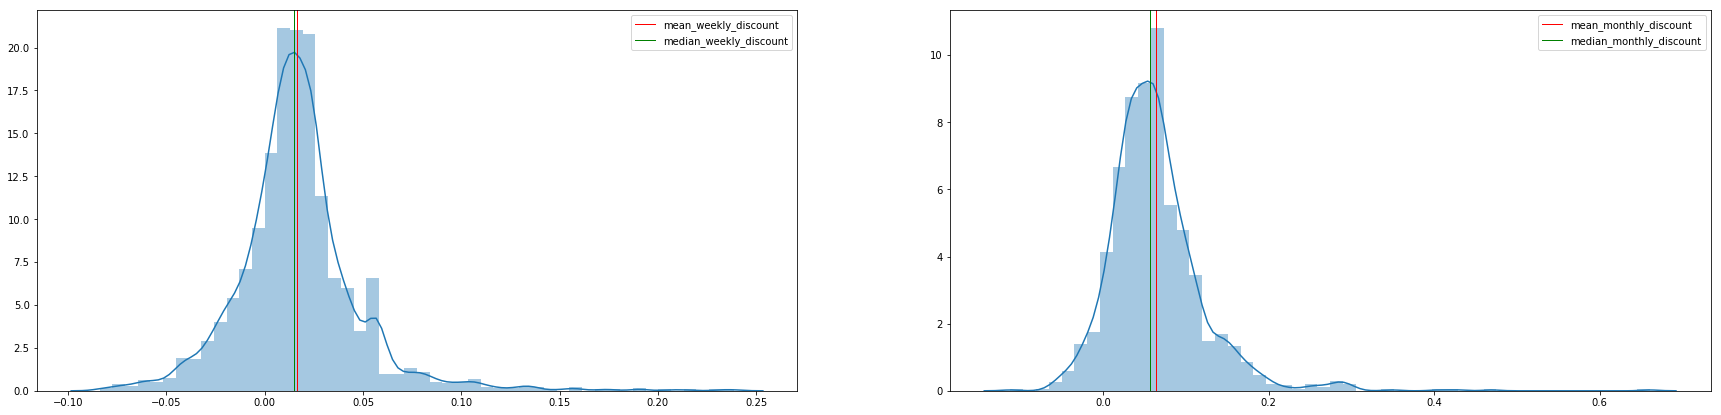

In [64]:
fig, ax = plt.subplots(1,2, figsize = (30,7))
sns.distplot(weekly_price_discounts, ax =ax[0]);
ax[0].axvline(weekly_price_discounts.mean(), label = 'mean_weekly_discount', color = 'red', linewidth = 1)
ax[0].axvline(weekly_price_discounts.median(), label = 'median_weekly_discount', color = 'green', linewidth = 1)
ax[0].legend(loc = 'best')
sns.distplot(monthly_price_discounts, ax = ax[1]);
ax[1].axvline(monthly_price_discounts.mean(), label = 'mean_monthly_discount', color = 'red', linewidth = 1)
ax[1].axvline(monthly_price_discounts.median(), label = 'median_monthly_discount', color = 'green', linewidth = 1)
ax[1].legend(loc = 'best')

In [65]:
print('Mean weekly discount = ' +str(weekly_price_discounts.mean()*100))
print('Median weekly discount = ' +str(weekly_price_discounts.median()*100))
print('Std. weekly discount = ' + str(weekly_price_discounts.std()*100))

print('Min weekly discount = ' + str(weekly_price_discounts.min()*100))
print('Max weekly discount = ' + str(weekly_price_discounts.max()*100))
print('-------------')

print('Mean monthly discount = ' +str(monthly_price_discounts.mean()*100))
print('Median monthly discount = ' +str(monthly_price_discounts.median()*100))
print('Std. monthly discount = ' + str(monthly_price_discounts.std()*100))

print('Min monthly discount = ' + str(monthly_price_discounts.min()*100))
print('Max monthly discount = ' + str(monthly_price_discounts.max()*100))

Mean weekly discount = 1.653796908504432
Median weekly discount = 1.5037593984962405
Std. weekly discount = 3.119679405353111
Min weekly discount = -8.40336134454
Max weekly discount = 23.8961038961
-------------
Mean monthly discount = 6.394831981153424
Median monthly discount = 5.714285714285714
Std. monthly discount = 5.783436888530508
Min monthly discount = -11.183237077
Max monthly discount = 66.0714285714


This is pretty interesting. Over and above what the numbers say:

1. Both weekly and monthly discounts can be negative!
<br>
    Meaning it could be cheaper to rent the house for each day instead of booking for a week or month. Ofcourse this is assuming the listing is actually continuously available for a month. Thats likely the reason for the negative values. The owners may need to put in extra work to keep the listing running for a week or month.
2. There is a lot more variance in the weekly discount than the monthly discount relative to their quantities

## 3. Variations across neighbourhoods in Seattle

#### 3.a Where are most listings concentrated?

In [66]:
seattle_listings.groupby('neighbourhood_group_cleansed').count().sort_values('id', ascending = False)[['id']]

,id
neighbourhood_group_cleansed,
Other neighborhoods,794
Capitol Hill,567
Downtown,530
Central Area,369
Queen Anne,295
Ballard,230
West Seattle,203
Rainier Valley,159
University District,122


In [67]:
len( seattle_listings.neighbourhood_cleansed.unique() )

87

To get a sense of where these areas are, lets refer to the Seattle map from the [Office of the city clerk, Seattle](http://clerk.ci.seattle.wa.us/~public/nmaps/fullcity.htm)

Excluding 'Other neighbourhoods', 4 of the top 5 neighbourhoods are in central Seattle. This seems natural in way. Closer to the city center, one can expect higher population density and a greater concentration of commerical and business spaces. Both could mean there is greater demand for listings in that area.

![Seattle map](http://clerk.ci.seattle.wa.us/~public/nmaps/fullcity600.jpg)

#### 3.b Is there a skew in distibution of prices across neighbourhoods?

In [68]:
seattle_listings.groupby('neighbourhood_group_cleansed').mean().sort_values('price', ascending = False)[['price']]

,price
neighbourhood_group_cleansed,
Magnolia,177.672131
Queen Anne,157.223729
Downtown,154.405660
West Seattle,141.359606
Cascade,140.101124
Capitol Hill,130.592593
Central Area,128.338753
Ballard,124.682609
Other neighborhoods,119.968514


We can still see that places in central seattle are priced a little higher, which is quite expected again. Typically real estate prices and cost of living is higher closer to the city center and this is reflected in the data.

However, the analysis isnt quite fair on one front. Its unfair to compare the price of a 3 bed listing with a single bed listing. While its hard to create a perfect metric that accounts for all such factors, lets start with the price/bed

Lets compute the price/bed and see how its distribution is. Is it similar to what we saw above?

In [69]:
seattle_listings['price_per_bed'] = seattle_listings.apply(lambda x: x['price']/x['beds'], axis = 1)

In [70]:
seattle_listings['price_per_bedroom'] = seattle_listings.apply(lambda x: price_per_unit(x['price'],x['bedrooms']), axis = 1)

In [71]:
seattle_listings.groupby('neighbourhood_group_cleansed').mean().sort_values('price_per_bed', ascending = False)[['price_per_bed']]

,price_per_bed
neighbourhood_group_cleansed,
Downtown,103.301539
Interbay,102.909091
Cascade,102.086142
Queen Anne,96.848878
Capitol Hill,91.282321
Magnolia,89.441335
West Seattle,78.830167
Central Area,77.767397
Ballard,73.265704


3 out of the top 5 overlap when comparing neighbourhoods by price and price/bed. Also central seattle still shows up on top here.

Hence one could say prices and prices/bed follow the same patterns across neighbourhoods.

If one extended the above analysis to price/bedroom, one would see similar results.

#### 3.c Are listings in some neighbourhoods more available than the other?

In [72]:
seattle_listings.groupby('neighbourhood_group_cleansed').mean().sort_values('availability_365', ascending = False)[['availability_365']]

,availability_365
neighbourhood_group_cleansed,
Interbay,308.545455
Magnolia,282.754098
Lake City,280.611940
Delridge,272.721519
University District,271.704918
Northgate,263.812500
Beacon Hill,256.525424
West Seattle,255.911330
Ballard,252.673913


4 of the bottom 5 availability areas are in central seattle.
There are 3 distinct buckets one could form here

High availability: >260 days available per year
Medium availability: 240-260 days available per year
Low availability: <240 days available per year

The high availability bucket consists of:

1. Interbay
2. Magnolia
3. Lake city
4. Delridge
5. University district

The medium availability bucket consists of:
1. Northgate
2. Beacon hill
3. West Seattle
4. Ballard
5. Seward park
6. Central area
7. Rainier valley

The low availability bucket consists of:
1. Downtown
2. Capitol hill
3. Queen Anne
4. Cascade

All of the low availability bucket is from Central Seattle

Note: Excluding 'other neighbourhoods' from the above lists